In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("customer_data.csv")

In [3]:
df = pd.DataFrame(data)
df

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [33]:
df_2 = df.tail(100).copy()

In [34]:
df_2

,name,age,gender,education,income,country,purchase_frequency,spending
900,Emily Campbell,55,Female,Master,63828,Puerto Rico,0.4,8876.560
901,Dr. Ashley Lopez,21,Male,PhD,88592,Nigeria,0.1,1742.960
902,Gary Jones,61,Female,Master,25588,French Guiana,0.9,18251.460
903,Cameron Daniels,30,Male,Bachelor,23947,French Polynesia,0.9,10977.615
904,Natasha Bennett,38,Male,Bachelor,94979,Tokelau,0.8,14199.160
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [36]:
x = df_2[['income', 'spending']]
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
df_2['cluster'] = dbscan.fit_predict(x_scaled)

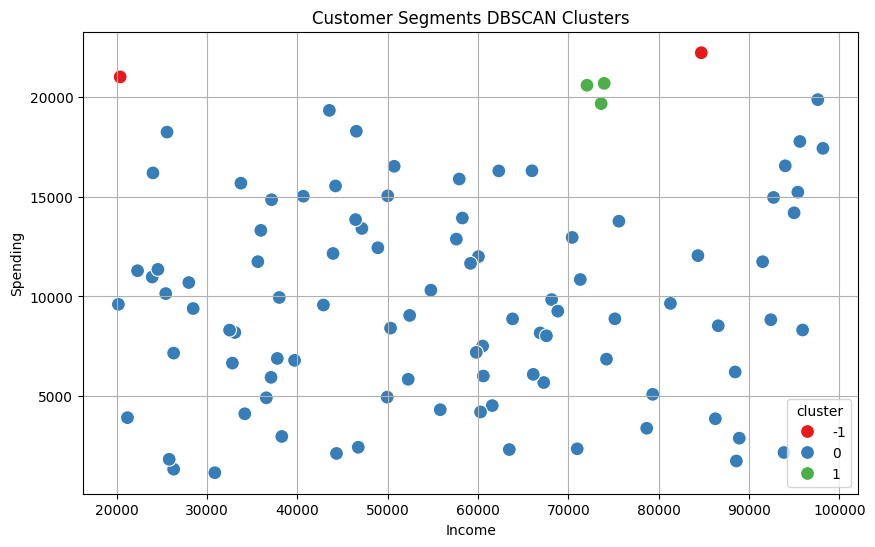

In [42]:
plt.figure(figsize=(10, 6) )
sns.scatterplot(data=df_2, x="income", y="spending", hue="cluster", palette="Set1", s=100)
plt.title("Customer Segments DBSCAN Clusters")
plt.xlabel("Income")    
plt.ylabel("Spending")
plt.grid(True)
plt.show()